# MiniProject on Detecting Offensive Content on Social Media
The idea of this project is to analyze a dataset and use it to train a Machine Learning model which can then use that model to predict is a tweet is Offensive or Not

In [1]:
# IMPORTING NECESSARY PACKAGES
import pandas_profiling
import nltk
import pandas as pd
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import warnings 
warnings.filterwarnings("ignore")
import unidecode
# Uncomment the lines below to update/download the ntlk stopwords & punkt packages
# nltk.download('wordnet')
# nltk.download('punkt')
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import plotly.express as px
from collections import Counter
%matplotlib inline

## Data Analysis
The aim here in this step is to **study, inspect, clean, transform and model the data** inorder to **discover useful the information** for training our Machine Learning Model to predict whether a *tweet* is Offensive or Not.<br>
Inorder to achieve the above tasks we'll use Python tools like <code>matplotlib</code>, <code>wordcloud</code>, <code>pandas-profiling</code>, etc. modules to visuialize our data.

In [2]:
# USING PANDAS TO READ THE FIRST DATASET CSV FILE
dataset1 = pd.read_csv('labeled_data.csv')
dataset1

Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0               0      3            0                   0        3      2   
1               1      3            0                   3        0      1   
2               2      3            0                   3        0      1   
3               3      3            0                   2        1      1   
4               4      6            0                   6        0      1   
...           ...    ...          ...                 ...      ...    ...   
24778       25291      3            0                   2        1      1   
24779       25292      3            0                   1        2      2   
24780       25294      3            0                   3        0      1   
24781       25295      6            0                   6        0      1   
24782       25296      3            0                   0        3      2   

                                                   tweet  
0      !!! RT @mayasolovely: As a woman you shouldn't...  
1      !!!!! RT @mleew17: boy dats cold...tyga dwn ba...  
2      !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...  
3      !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...  
4      !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...  
...                                                  ...  
24778  you's a muthaf***in lie &#8220;@LifeAsKing: @2...  
24779  you've gone and broke the wrong heart baby, an...  
24780  young buck wanna eat!!.. dat nigguh like I ain...  
24781              youu got wild bitches tellin you lies  
24782  ~~Ruffled | Ntac Eileen Dahlia - Beautiful col...  

[24783 rows x 7 columns]

The above labeled dataset is obtained from kaggle.com : <a href="https://www.kaggle.com/mrmorj/hate-speech-and-offensive-language-dataset">link to dataset</a>.
<br>The dataset has 7 columns:
- <code>Unnamed</code> : id for each tweet
- <code>count</code> : number of CrowdFlower users who coded each tweet (min is 3)
- <code>hate_speech</code> : number of CF users who judged the tweet to be hate speech
- <code>offensive_language</code> : number of CF users who judged the tweet to be offensive
- <code>neither</code> : number of CF users who judged the tweet to be neither offensive nor non-offensive
- <code>class</code> : class label for majority of CF users. 0 - hate speech 1 - offensive language 2 - neither
- <code>tweet</code> : text tweet
<br><br>Out of the above columns, the <code>class</code> and <code>tweet</code> are most important in order to train the model. So we will get rid of the other columns.

In [3]:
df1 = dataset1.drop(columns=dataset1.columns[[0,1,2,3,4]],axis=1)
df1

class                                              tweet
0          2  !!! RT @mayasolovely: As a woman you shouldn't...
1          1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2          1  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3          1  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4          1  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...      ...                                                ...
24778      1  you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779      2  you've gone and broke the wrong heart baby, an...
24780      1  young buck wanna eat!!.. dat nigguh like I ain...
24781      1              youu got wild bitches tellin you lies
24782      2  ~~Ruffled | Ntac Eileen Dahlia - Beautiful col...

[24783 rows x 2 columns]

In [4]:
# USING PANDAS-PROFILING TO GET INFORMATION ABOUT OUR TRAINING DATAFRAME-1
pandas_profiling.ProfileReport(df1)

Summarize dataset:   0%|          | 0/16 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
dataset2 = pd.read_csv('labeled_data2.csv')
dataset2

id  label                                              tweet
0          1      0   @user when a father is dysfunctional and is s...
1          2      0  @user @user thanks for #lyft credit i can't us...
2          3      0                                bihday your majesty
3          4      0  #model   i love u take with u all the time in ...
4          5      0             factsguide: society now    #motivation
...      ...    ...                                                ...
31957  31958      0  ate @user isz that youuu?ðððððð...
31958  31959      0    to see nina turner on the airwaves trying to...
31959  31960      0  listening to sad songs on a monday morning otw...
31960  31961      1  @user #sikh #temple vandalised in in #calgary,...
31961  31962      0                   thank you @user for you follow  

[31962 rows x 3 columns]

The above labeled dataset is obtained from kaggle.com : <a href="https://www.kaggle.com/arkhoshghalb/twitter-sentiment-analysis-hatred-speech?select=train.csv">link to dataset</a>.
<br>The dataset has 3 columns:
- <code>id</code> : id for each tweet
- <code>label</code> : class label for the tweet 0 - offensive, 1 - non-offensive
- <code>tweet</code> : text tweet
<br><br>Out of the above columns, the <code>label</code> and <code>tweet</code> are most important in order to train the model. So we will get rid of the other columns.

In [6]:
df2 = dataset2.drop(columns=['id'],axis=1)
df2

label                                              tweet
0          0   @user when a father is dysfunctional and is s...
1          0  @user @user thanks for #lyft credit i can't us...
2          0                                bihday your majesty
3          0  #model   i love u take with u all the time in ...
4          0             factsguide: society now    #motivation
...      ...                                                ...
31957      0  ate @user isz that youuu?ðððððð...
31958      0    to see nina turner on the airwaves trying to...
31959      0  listening to sad songs on a monday morning otw...
31960      1  @user #sikh #temple vandalised in in #calgary,...
31961      0                   thank you @user for you follow  

[31962 rows x 2 columns]

In [7]:
# USING PANDAS-PROFILING TO GET INFORMATION ABOUT OUR TRAINING DATAFRAME-2
pandas_profiling.ProfileReport(df2)

Summarize dataset:   0%|          | 0/16 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

The aim now will be to combine <code>df1</code> and <code>df2</code> to get a single training dataframe. Inorder to achieve that we will modify our <code>df1</code> to look like df2 i.e. we will introduce a <code>label</code> column instead of <code>class</code> column.

In [8]:
df1.rename(columns={'class':'label'},inplace=True)
df1['label'] = df1['label'].apply(lambda x : 0 if x == 2 else 1)
df1

label                                              tweet
0          0  !!! RT @mayasolovely: As a woman you shouldn't...
1          1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2          1  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3          1  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4          1  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...      ...                                                ...
24778      1  you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779      0  you've gone and broke the wrong heart baby, an...
24780      1  young buck wanna eat!!.. dat nigguh like I ain...
24781      1              youu got wild bitches tellin you lies
24782      0  ~~Ruffled | Ntac Eileen Dahlia - Beautiful col...

[24783 rows x 2 columns]

In [9]:
df = df1.append(df2)
df

label                                              tweet
0          0  !!! RT @mayasolovely: As a woman you shouldn't...
1          1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2          1  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3          1  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4          1  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...      ...                                                ...
31957      0  ate @user isz that youuu?ðððððð...
31958      0    to see nina turner on the airwaves trying to...
31959      0  listening to sad songs on a monday morning otw...
31960      1  @user #sikh #temple vandalised in in #calgary,...
31961      0                   thank you @user for you follow  

[56745 rows x 2 columns]

### Data Cleaning

- Remove User Handles (@user) and create new column 'clean_tweet'

In [10]:
df['clean_tweet'] = df['tweet'].apply(lambda x : ' '.join([tweet for tweet in x.split()if not tweet.startswith("@")]))
df.head()

label                                              tweet  \
0      0  !!! RT @mayasolovely: As a woman you shouldn't...   
1      1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...   
2      1  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...   
3      1  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...   
4      1  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...   

                                         clean_tweet  
0  !!! RT As a woman you shouldn't complain about...  
1  !!!!! RT boy dats cold...tyga dwn bad for cuff...  
2  !!!!!!! RT Dawg!!!! RT You ever fuck a bitch a...  
3                !!!!!!!!! RT she look like a tranny  
4  !!!!!!!!!!!!! RT The shit you hear about me mi...

- Removing punctuations, special characters and unnecessary characters

In [11]:
df['clean_tweet'] = df['clean_tweet'].str.replace("[^a-zA-Z#*]"," ")
df['clean_tweet'] = df['clean_tweet'].str.replace("RT","")
df['clean_tweet'] = df['clean_tweet'].str.replace(r"#(\W+)","")
df.head()

label                                              tweet  \
0      0  !!! RT @mayasolovely: As a woman you shouldn't...   
1      1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...   
2      1  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...   
3      1  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...   
4      1  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...   

                                         clean_tweet  
0       As a woman you shouldn t complain about c...  
1         boy dats cold   tyga dwn bad for cuffin...  
2           Dawg      You ever fuck a bitch and s...  
3                             she look like a tranny  
4                 The shit you hear about me migh...

- Removing all the greek characters using <code>unidecode</code> library

In [12]:
df['clean_tweet'] = df['clean_tweet'].apply(lambda x : ' '.join([unidecode.unidecode(word) for word in x.split()]))
df.head()

label                                              tweet  \
0      0  !!! RT @mayasolovely: As a woman you shouldn't...   
1      1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...   
2      1  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...   
3      1  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...   
4      1  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...   

                                         clean_tweet  
0  As a woman you shouldn t complain about cleani...  
1  boy dats cold tyga dwn bad for cuffin dat hoe ...  
2  Dawg You ever fuck a bitch and she start to cr...  
3                             she look like a tranny  
4  The shit you hear about me might be true or it...

- Create a new column which will contain all the hashtags related to the tweet

In [13]:
df['hashtags'] = df['clean_tweet'].apply(lambda x : ' '.join([word for word in x.split() if word.startswith('#')]))
df.head()

label                                              tweet  \
0      0  !!! RT @mayasolovely: As a woman you shouldn't...   
1      1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...   
2      1  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...   
3      1  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...   
4      1  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...   

                                         clean_tweet hashtags  
0  As a woman you shouldn t complain about cleani...           
1  boy dats cold tyga dwn bad for cuffin dat hoe ...           
2  Dawg You ever fuck a bitch and she start to cr...           
3                             she look like a tranny           
4  The shit you hear about me might be true or it...

In [14]:
df.loc[(df['hashtags'] == ''),'hashtags']='No Tags'
df.head()

label                                              tweet  \
0      0  !!! RT @mayasolovely: As a woman you shouldn't...   
1      1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...   
2      1  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...   
3      1  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...   
4      1  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...   

                                         clean_tweet hashtags  
0  As a woman you shouldn t complain about cleani...  No Tags  
1  boy dats cold tyga dwn bad for cuffin dat hoe ...  No Tags  
2  Dawg You ever fuck a bitch and she start to cr...  No Tags  
3                             she look like a tranny  No Tags  
4  The shit you hear about me might be true or it...  No Tags

- Remove Stopwords<br>
Stopwords are the words in any language which does not add much meaning to a sentence. They can safely be ignored without sacrificing the meaning of the sentence, such as - the, is, at, which, and on.

In [15]:
stopWords = set(stopwords.words('english'))
df['clean_tweet'] = df['clean_tweet'].apply(lambda x : ' '.join([word for word in x.split() if word not in stopWords]))
df.head()

label                                              tweet  \
0      0  !!! RT @mayasolovely: As a woman you shouldn't...   
1      1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...   
2      1  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...   
3      1  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...   
4      1  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...   

                                         clean_tweet hashtags  
0  As woman complain cleaning house amp man alway...  No Tags  
1  boy dats cold tyga dwn bad cuffin dat hoe st p...  No Tags  
2  Dawg You ever fuck bitch start cry You confuse...  No Tags  
3                                   look like tranny  No Tags  
4  The shit hear might true might faker bitch tol...  No Tags

- Lemmatization: It normally aims to remove inflectional endings only and to return the base or dictionary form of a word, which is known as the lemma.<br>
Example:<br>
am, are, is $\Rightarrow$ be<br>
car, cars, car's, cars' $\Rightarrow$ car

In [16]:
#Lemmitization
lemmatizer = WordNetLemmatizer()
df['clean_tweet'] = df['clean_tweet'].apply(lambda x : ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))
df.head()

label                                              tweet  \
0      0  !!! RT @mayasolovely: As a woman you shouldn't...   
1      1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...   
2      1  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...   
3      1  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...   
4      1  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...   

                                         clean_tweet hashtags  
0  As woman complain cleaning house amp man alway...  No Tags  
1  boy dat cold tyga dwn bad cuffin dat hoe st place  No Tags  
2  Dawg You ever fuck bitch start cry You confuse...  No Tags  
3                                   look like tranny  No Tags  
4  The shit hear might true might faker bitch tol...  No Tags

- Tokenization: It is a way of separating a piece of text into smaller units called tokens. Tokens can be either words, characters, or subwords.<br>
Example:<br>
It is a nice day.<br>
can be broken down as -<br>
it, is, a, nice, day

In [17]:
ps = PorterStemmer()
tokens = []
for tweet in df['clean_tweet']:
    tweet = str(tweet)
    tweet = tweet.lower()
    tweet = tweet.split()
    tweet = [ps.stem(word) for word in tweet if word not in stopWords]
    tweet = ' '.join(tweet)
    tokens.append(tweet)
df['clean_tweet'] = tokens
df.head()

label                                              tweet  \
0      0  !!! RT @mayasolovely: As a woman you shouldn't...   
1      1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...   
2      1  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...   
3      1  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...   
4      1  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...   

                                         clean_tweet hashtags  
0  woman complain clean hous amp man alway take t...  No Tags  
1  boy dat cold tyga dwn bad cuffin dat hoe st place  No Tags  
2         dawg ever fuck bitch start cri confus shit  No Tags  
3                                   look like tranni  No Tags  
4     shit hear might true might faker bitch told ya  No Tags

### Data Visualization

- WordCloud to illustrate all the Non-Offensive Words in the <code>df['clean_tweets']</code>

Normal words


(-0.5, 799.5, 499.5, -0.5)

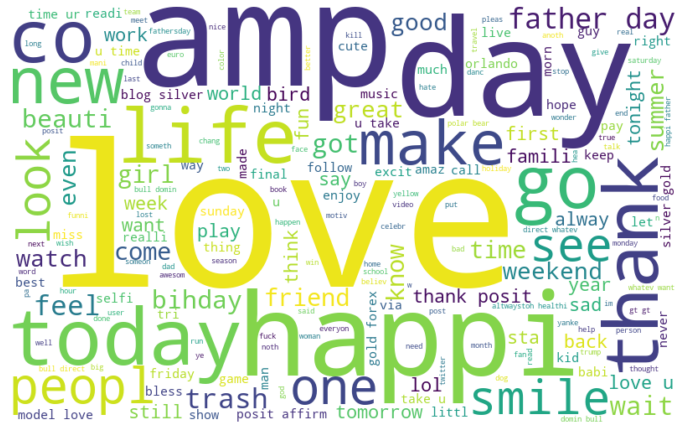

In [18]:
normal_words = ' '.join([word for word in df['clean_tweet'][df['label'] == 0]])
wc = WordCloud(background_color="white",width = 800, height = 500).generate(normal_words)
print('Normal words')
plt.figure(figsize= (12,8))
plt.imshow(wc, interpolation = 'bilinear',cmap='viridis')
plt.axis('off')

- WordCloud to illustrate all the Offensive Words in the <code>df['clean_tweets']</code>

Hate words


(-0.5, 799.5, 499.5, -0.5)

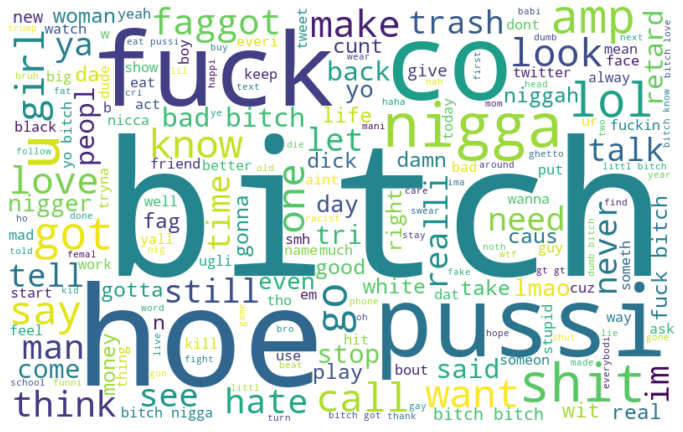

In [19]:
hate_words = ' '.join([word for word in df['clean_tweet'][df['label'] == 1]])
wc = WordCloud(background_color="white",width = 800, height = 500).generate(hate_words)
print('Hate words')
plt.figure(figsize= (12,8))
plt.imshow(wc, interpolation = 'bilinear',cmap='viridis')
plt.axis('off')

- Illustrate the hashtags in <code>df['clean_tweet']</code>

In [20]:
# FUNCTION TO EXTRACT THE HASHTAGS
def extractHashtags(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
    return hashtags

In [21]:
normalHashtags = extractHashtags(df['clean_tweet'][df['label'] == 0])
hateHashtags = extractHashtags(df['clean_tweet'][df['label'] == 1])

# Converting a multidimensional list to a 1-D list
normalHashtags = sum(normalHashtags,[])
hateHashtags = sum(hateHashtags,[])

In [22]:
normalHashtagsCount = Counter(normalHashtags)
normalHashtagsCount = dict(normalHashtagsCount.most_common())
normalHashtagsCount

{'love': 1648,
 'posit': 917,
 'smile': 673,
 'healthi': 573,
 'thank': 533,
 'fun': 462,
 'affirm': 423,
 'life': 423,
 'i': 394,
 'summer': 389,
 'model': 374,
 'cute': 366,
 'beauti': 361,
 'happi': 358,
 'blog': 356,
 'friend': 342,
 'fathersday': 340,
 'me': 335,
 'gold': 301,
 'day': 301,
 'silver': 300,
 'altwaystoh': 295,
 'famili': 285,
 'bihday': 284,
 'girl': 283,
 'music': 281,
 'weekend': 273,
 'forex': 265,
 'selfi': 264,
 'quot': 255,
 'orlando': 239,
 'friday': 237,
 'bless': 237,
 'instagood': 223,
 'heal': 213,
 'father': 207,
 'motiv': 202,
 'peac': 198,
 'follow': 186,
 'depress': 185,
 'dog': 185,
 'inspir': 183,
 'sun': 178,
 'work': 175,
 'dad': 165,
 'sunday': 163,
 'photooftheday': 161,
 'grate': 160,
 'a': 159,
 'euro': 157,
 'travel': 154,
 'fashion': 151,
 'followm': 150,
 'tbt': 142,
 'like': 140,
 'fit': 138,
 'funni': 138,
 'cool': 136,
 'holiday': 132,
 'home': 128,
 'beach': 123,
 'enjoy': 122,
 'wed': 119,
 'success': 119,
 'food': 117,
 'hot': 115,
 '

In [23]:
hateHashtagsCount = Counter(hateHashtags)
hateHashtagsCount = dict(hateHashtagsCount.most_common())
hateHashtagsCount

{'trump': 136,
 'polit': 95,
 'allahsoil': 92,
 'liber': 85,
 'libtard': 78,
 'sjw': 75,
 'retweet': 63,
 'iphon': 48,
 'xxx': 47,
 'black': 46,
 'miami': 46,
 'porn': 45,
 'android': 45,
 'ipad': 45,
 'sex': 45,
 'obama': 38,
 'hate': 37,
 'bigot': 36,
 'tcot': 34,
 'tampa': 32,
 'blm': 28,
 'hispan': 28,
 'brexit': 27,
 'sikh': 27,
 'calgari': 27,
 'bitch': 26,
 'templ': 26,
 'wso': 26,
 'teambt': 26,
 'maga': 25,
 'malevot': 24,
 'boricua': 24,
 'misogyni': 23,
 'emirati': 23,
 'faggot': 22,
 'america': 22,
 'seashepherd': 22,
 'bigotri': 21,
 'blacklivesmatt': 21,
 'misogynist': 21,
 'leadership': 21,
 'feminismiscanc': 20,
 'feminismisterror': 20,
 'feminismmuktbharat': 20,
 'antirac': 20,
 'altright': 18,
 'hatr': 18,
 'homophob': 17,
 'white': 17,
 'resist': 17,
 'notmypresid': 17,
 'nazi': 16,
 'pussi': 15,
 'u': 15,
 'israel': 15,
 'carlpaladino': 15,
 'newyork': 15,
 'race': 14,
 'usa': 14,
 'retard': 13,
 'kkk': 13,
 'republican': 13,
 'southafrica': 13,
 'putinschoic': 13,


In [24]:
normalHashtagsCounter = list(normalHashtagsCount.values())
print(normalHashtagsCounter[0:4])
normalHashtagsTag = list(normalHashtagsCount.keys())
print(normalHashtagsTag[0:4])

[1648, 917, 673, 573]
['love', 'posit', 'smile', 'healthi']


In [25]:
hateHashtagsCounter = list(hateHashtagsCount.values())
print(hateHashtagsCounter[0:4])
hateHashtagsTag = list(hateHashtagsCount.keys())
print(hateHashtagsTag[0:4])

[136, 95, 92, 85]
['trump', 'polit', 'allahsoil', 'liber']


In [26]:
#Creating a dataframe to represent top 20 positive and negative hash words
c1 = pd.DataFrame(normalHashtagsTag[0:20],columns = ['Positive_Words'])
c2 = pd.DataFrame(normalHashtagsCounter[0:20],columns = ['Positive_Count'])
c3 = pd.DataFrame(hateHashtagsTag[0:20],columns = ['Negative_Words'])
c4 = pd.DataFrame(hateHashtagsCounter[0:20],columns = ['Negative_Count'])
hashtagsCount = pd.concat([c1,c2,c3,c4],axis = 1)
hashtagsCount

Positive_Words  Positive_Count Negative_Words  Negative_Count
0            love            1648          trump             136
1           posit             917          polit              95
2           smile             673      allahsoil              92
3         healthi             573          liber              85
4           thank             533        libtard              78
5             fun             462            sjw              75
6          affirm             423        retweet              63
7            life             423          iphon              48
8               i             394            xxx              47
9          summer             389          black              46
10          model             374          miami              46
11           cute             366           porn              45
12         beauti             361        android              45
13          happi             358           ipad              45
14           blog             356            sex              45
15         friend             342          obama              38
16     fathersday             340           hate              37
17             me             335          bigot              36
18           gold             301           tcot              34
19            day             301          tampa              32

In [27]:
# Histogram to represent top 20 positive/non-offensive hashtags in the df
fig = px.bar(hashtagsCount, x="Positive_Words", y="Positive_Count",
            hover_name="Positive_Words",color = 'Positive_Count')
fig.show()

In [28]:
# # Histogram to represent top 20 negative/offensive hashtags in the df
fig = px.bar(hashtagsCount, x="Negative_Words", y="Negative_Count",
            hover_name="Negative_Words",color= 'Negative_Count')
fig.show()

### Exporting Dataset as cvs for Model Training
In the <code>df</code> the columns <code>tweet</code> and <code>hashtags</code> are not of any importance when it comes to training the Model. So, we'll drop these columns and export the training data in a new csv file: <code>clean_traindata.csv</code>

In [29]:
# DROPPING hashtags column AS IT WON'T BE OF ANY USE IN MODEL TRAINING
df = df.drop(columns=['tweet','hashtags'],axis=1)
df.to_csv('clean_traindata.csv',index=False)

## Model Training
The aim here is to **create and train a Machine Learning Model** which can take data as input and predict whether a *tweet* is Offensive or Not.<br>
Inorder to achieve the above task we'll use the Python library <code>sklearn</code> which has tools like <code>TfidVectorizer</code>, <code>train_test_split</code>, <code>LogisticRegression</code>, etc. to assist in fast production of a Machine Learning Model.<br>We will also use <code>pickle</code> library to save our Machine Learning Model.

In [30]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
import os

In [31]:
dataset = pd.read_csv('./clean_traindata.csv')
X = dataset['clean_tweet']
Y = dataset['label']
dataset.head()

label                                        clean_tweet
0      0  woman complain clean hous amp man alway take t...
1      1  boy dat cold tyga dwn bad cuffin dat hoe st place
2      1         dawg ever fuck bitch start cri confus shit
3      1                                   look like tranni
4      1     shit hear might true might faker bitch told ya

In [32]:
if os.path.exists(path='./trained_model.pickle') and os.path.exists(path='./vectorizer.pickle'):
    print("loading model....")
    model = pickle.load(open("./trained_model.pickle","rb"))
    vectorizer = pickle.load(open("./vectorizer.pickle","rb"))
else:
    print("creating and training a new model....")
    vectorizer = TfidfVectorizer()
    bestAccuracy = 0
    for _ in range(50):
        from sklearn.model_selection import train_test_split
        x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.25)
        x_train = vectorizer.fit_transform(x_train.values.astype('U'))
        x_test = vectorizer.transform(x_test.values.astype('U'))

        from sklearn.linear_model import LogisticRegression
        LRModel = LogisticRegression()
        LRModel.fit(x_train,y_train)

        accuracy = LRModel.score(x_test,y_test)

        if accuracy>bestAccuracy:
            bestAccuracy=accuracy
            print("Current Best Accuracy : {:.2f}%".format(accuracy*100))
            with open("trained_model.pickle","wb") as fout:
                pickle.dump(LRModel,file=fout)
            with open("./vectorizer.pickle","wb") as file:
                pickle.dump(vectorizer,file=file)
    
    print("model training completed sucessfully")
    model = pickle.load(open("./trained_model.pickle","rb"))
    vectorizer = pickle.load(open("./vectorizer.pickle","rb"))
print("model and vectorizer loaded sucessfully!")

creating and training a new model....
Current Best Accuracy : 94.45%
Current Best Accuracy : 94.83%
Current Best Accuracy : 94.93%
model training completed sucessfully
model and vectorizer loaded sucessfully!


### Model Testing
Now since we have sucessfully created a trained model on our training data. We can use the <code>trained_model.pickle</code> file to test our model on input data.

In [33]:
# HELPER FUNCTIONS
def decision(results):
    outcome = []
    for prediction in results:
        if prediction == 0:
            outcome.append("Non-Offensive Tweet")
        elif prediction == 1:
            outcome.append("Offensive Tweet")
    return outcome

def cleanData(df):
    df['text'] = df['text'].apply(lambda x : ' '.join([tweet for tweet in x.split()if not tweet.startswith("@")]))
    df['text'] = df['text'].str.replace("[^a-zA-Z#*]"," ")
    df['text'] = df['text'].str.replace("RT","")
    df['text'] = df['text'].str.replace(r"#(\W+)","")
    df['text'] = df['text'].apply(lambda x : ' '.join([unidecode.unidecode(word) for word in x.split()]))
    stopWords = set(stopwords.words('english'))
    df['text'] = df['text'].apply(lambda x : ' '.join([word for word in x.split() if word not in stopWords]))
    from nltk.stem import WordNetLemmatizer 
    lemmatizer = WordNetLemmatizer()
    df['text'] = df['text'].apply(lambda x : ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))
    ps = PorterStemmer()
    tokens = []
    for i in range(0,len(df)):
        tweet = df['text'][i]
        tweet = tweet.lower()
        tweet = tweet.split()
        tweet = [ps.stem(word) for word in tweet if word not in stopWords]
        tweet = ' '.join(tweet)
        tokens.append(tweet)
    df['text'] = tokens
    return df

def vectorizeData(df):
    test = vectorizer.transform(df['text'].values.astype('U'))
    return(test)

In [34]:
#INPUT TWEETS
notweets = int(input("Enter no. of tweets : "))
tweets = []
for i in range(notweets):
    tweet = input("Enter Tweet : ")
    tweets.append(tweet)
tweets

Enter no. of tweets : 10
Enter Tweet : @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run
Enter Tweet : i spend my money how i want bitch its my business
Enter Tweet : @user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked
Enter Tweet : bihday your majesty
Enter Tweet : @BeenBasedB: @_KudaBrazyy http://t.co/LuUBGL9Y5u 0 rings 0 mvps 0 bitches lol
Enter Tweet : #model   i love u take with u all the time in urð±!!! ððððð¦ð¦ð¦  
Enter Tweet : factsguide: society now    #motivation
Enter Tweet : @CeleyNichole: @white_thunduh how come you never bring me food i dont have a car retard
Enter Tweet : @NastyCopper: Money getting taller and bitches getting blurry
Enter Tweet : @NoChillPaz: At least I'm not a nigger http://t.co/RGJa7CfoiT Lmfao


['@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run',
 'i spend my money how i want bitch its my business',
 "@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked",
 'bihday your majesty',
 '@BeenBasedB: @_KudaBrazyy http://t.co/LuUBGL9Y5u 0 rings 0 mvps 0 bitches lol',
 '#model   i love u take with u all the time in urð\x9f\x93±!!! ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91\x85ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦  ',
 'factsguide: society now    #motivation',
 '@CeleyNichole: @white_thunduh how come you never bring me food i dont have a car retard',
 '@NastyCopper: Money getting taller and bitches getting blurry',
 "@NoChillPaz: At least I'm not a nigger http://t.co/RGJa7CfoiT Lmfao"]

In [35]:
#CONVERT TWEETS TO DATAFRAME
df = pd.DataFrame(tweets,columns=['text'])
df

text
0  @user when a father is dysfunctional and is so...
1  i spend my money how i want bitch its my business
2  @user @user thanks for #lyft credit i can't us...
3                                bihday your majesty
4  @BeenBasedB: @_KudaBrazyy http://t.co/LuUBGL9Y...
5  #model   i love u take with u all the time in ...
6             factsguide: society now    #motivation
7  @CeleyNichole: @white_thunduh how come you nev...
8  @NastyCopper: Money getting taller and bitches...
9  @NoChillPaz: At least I'm not a nigger http://...

In [36]:
#CLEAN AND VECTORIZE THE TWEETS DATAFRAME
df = cleanData(df)
df = vectorizeData(df)

In [37]:
predictions = model.predict(df)
result = decision(predictions)
for i in range(len(tweets)):
    print(tweets[i],"\n\t",result[i])

@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run 
	 Non-Offensive Tweet
i spend my money how i want bitch its my business 
	 Offensive Tweet
@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked 
	 Non-Offensive Tweet
bihday your majesty 
	 Non-Offensive Tweet
@BeenBasedB: @_KudaBrazyy http://t.co/LuUBGL9Y5u 0 rings 0 mvps 0 bitches lol 
	 Offensive Tweet
#model   i love u take with u all the time in urð±!!! ððððð¦ð¦ð¦   
	 Non-Offensive Tweet
factsguide: society now    #motivation 
	 Non-Offensive Tweet
@CeleyNichole: @white_thunduh how come you never bring me food i dont have a car retard 
	 Offensive Tweet
@NastyCopper: Money getting taller and bitches getting blurry 
	 Offensive Tweet
@NoChillPaz: At least I'm not a nigger http://t.co/RGJa7CfoiT Lmfao 
	 Offensive Tweet
